In [1]:
#pip install nba_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.2/257.2 kB 3.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [37]:
import requests
import pandas as pd
import numpy as np
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import PlayerCareerStats

In [ ]:
#https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/1629630.png

In [61]:
# get a full list of players
nba_players = players.get_players()
df = pd.DataFrame(nba_players)
df.sample(5)

,id,full_name,first_name,last_name,is_active
2592,77416,Chuck Lowery,Chuck,Lowery,False
4532,78495,Walt Wesley,Walt,Wesley,False
2500,101135,David Lee,David,Lee,False
3466,203143,Pablo Prigioni,Pablo,Prigioni,False
407,1626164,Devin Booker,Devin,Booker,True


In [62]:
player_id=df.loc[df['first_name']=='LeBron']['id']
player_id

2075    2544
Name: id, dtype: int64

In [63]:
https://ak-static.cms.nba.com/wp-content/uploads/headshots/nba/latest/260x190/2544.png

SyntaxError: invalid syntax (4055844334.py, line 1)

In [78]:
player_stats = PlayerCareerStats(player_id=player_id)
df = player_stats.get_data_frames()[0]

In [65]:
df.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [73]:
df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,2544,2003-04,00,1610612739,CLE,19.0,79,79,3120.0,622,...,0.754,99,333,432,465,130,58,273,149,1654
1,2544,2004-05,00,1610612739,CLE,20.0,80,80,3388.0,795,...,0.750,111,477,588,577,177,52,262,146,2175
2,2544,2005-06,00,1610612739,CLE,21.0,79,79,3361.0,875,...,0.738,75,481,556,521,123,66,260,181,2478
3,2544,2006-07,00,1610612739,CLE,22.0,78,78,3190.0,772,...,0.698,83,443,526,470,125,55,250,171,2132
4,2544,2007-08,00,1610612739,CLE,23.0,75,74,3027.0,794,...,0.712,133,459,592,539,138,81,255,165,2250
5,2544,2008-09,00,1610612739,CLE,24.0,81,81,3054.0,789,...,0.780,106,507,613,587,137,93,241,139,2304
6,2544,2009-10,00,1610612739,CLE,25.0,76,76,2966.0,768,...,0.767,71,483,554,651,125,77,261,119,2258
7,2544,2010-11,00,1610612748,MIA,26.0,79,79,3063.0,758,...,0.759,80,510,590,554,124,50,284,163,2111
8,2544,2011-12,00,1610612748,MIA,27.0,62,62,2326.0,621,...,0.771,94,398,492,387,115,50,213,96,1683
9,2544,2012-13,00,1610612748,MIA,28.0,76,76,2877.0,765,...,0.753,97,513,610,551,129,67,226,110,2036


In [67]:
total_games=df['GP'].sum()
total_games

1421

In [ ]:
'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'TOV'

In [40]:
FG_PCT=df['FGM'].sum()/df['FGA'].sum()
FG_PCT

0.5046355726715162

In [42]:
FT_PCT=df['FTM'].sum()/df['FTA'].sum()
FT_PCT

0.7351818181818182

In [45]:
FG3_PCT=df['FG3M'].sum()/df['FG3A'].sum()
FG3_PCT

0.3445070851744629

In [47]:
AST=df['AST'].sum()/total_games
AST

7.332864180154821

In [49]:
REB=df['REB'].sum()/total_games
REB

7.506685432793807

In [50]:
TOV=df['TOV'].sum()/total_games
TOV

3.4947220267417314

In [68]:
def p_stat_calculater(df):
    """
    This with take in the the data frame for a player and calculate the per game stats regardless 
    of season. #Later add the playoff to the stats
    
    """
    total_games=df['GP'].sum()
    FG_PCT=df['FGM'].sum()/df['FGA'].sum()
    FT_PCT=df['FTM'].sum()/df['FTA'].sum()
    FG3_PCT=df['FG3M'].sum()/df['FG3A'].sum()
    AST=df['AST'].sum()/total_games
    REB=df['REB'].sum()/total_games
    TOV=df['TOV'].sum()/total_games
    
    stats_dict = {'FG_PCT': FG_PCT, 'FT_PCT': FT_PCT, 'FG3_PCT': FG3_PCT, 'AST': AST, 'REB': REB, 'TOV': TOV}
    
    stats_df = pd.DataFrame(stats_dict, index=[0])
    
    return stats_df

In [69]:
p_stat_calculater(df)

,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,0.504636,0.735182,0.344507,7.332864,7.506685,3.494722


In [70]:
df=p_stat_calculater(df)
df.columns = ['fg_pct_away', 'ft_pct_away', 'fg3_pct_away', 'ast_away', 'reb_away', 'to_away']
df_away=df
df_away

,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,to_away
0,0.504636,0.735182,0.344507,7.332864,7.506685,3.494722


In [79]:
df=p_stat_calculater(df)
df.columns = ['fg_pct_home', 'ft_pct_home', 'fg3_pct_home', 'ast_home', 'reb_home', 'to_home']
df_home=df

In [80]:
df_home

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,to_home
0,0.504636,0.735182,0.344507,7.332864,7.506685,3.494722


In [81]:
df = pd.concat([df_home, df_away], axis=1)

In [82]:
df_combined

,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,reb_home,to_home,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,to_away
0,0.504636,0.735182,0.344507,7.332864,7.506685,3.494722,0.504636,0.735182,0.344507,7.332864,7.506685,3.494722


In [92]:
np.floor(20.2)

20.0

# New code for PCA

In [4]:
import requests
import pandas as pd
import numpy as np
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import PlayerCareerStats

In [6]:
def p_stat_calculater(df):
    """
    This function takes in the dataframe for a player and calculates the per game stats regardless 
    of season. It drops rows with null values before calculating the stats. 
    If a division by zero occurs, it sets the result to zero.
    """
    # Drop rows with null values
    df = df.dropna()
    
    total_games = df['GP'].sum()
    if total_games<200 :
        return None
    
    try:
        FG_PCT = df['FGM'].sum() / df['FGA'].sum()
    except ZeroDivisionError:
        FG_PCT = 0.0
    
    try:
        FT_PCT = df['FTM'].sum() / df['FTA'].sum()
    except ZeroDivisionError:
        FT_PCT = 0.0
    
    try:
        FG3_PCT = df['FG3M'].sum() / df['FG3A'].sum()
    except ZeroDivisionError:
        FG3_PCT = 0.0
    
    AST = df['AST'].sum() / total_games
    REB = df['REB'].sum() / total_games
    TOV = df['TOV'].sum() / total_games
    BLK = df['BLK'].sum() / total_games
    STL = df['STL'].sum() / total_games
    PTS = df['PTS'].sum() / total_games
    
    stats_dict = {'PTS': PTS,'FG_PCT': FG_PCT, 'FT_PCT': FT_PCT, 'FG3_PCT': FG3_PCT, 'AST': AST, 'REB': REB,  'STL': STL,'BLK': BLK, 'TOV': TOV}
    
    stats_df = pd.DataFrame(stats_dict, index=[0])
    
    return stats_df

In [7]:
nba_players = players.get_players()

# create a dictionary to store the player names and their ID numbers
player_ids = {player['full_name']: player['id'] for player in nba_players}
df = pd.DataFrame(list(player_ids.items()), columns=['Player Name', 'ID'])


In [8]:
df.head()

,Player Name,ID
0,Alaa Abdelnaby,76001
1,Zaid Abdul-Aziz,76002
2,Kareem Abdul-Jabbar,76003
3,Mahmoud Abdul-Rauf,51
4,Tariq Abdul-Wahad,1505


In [9]:
df.size

9550

In [10]:
df.columns=df.columns.str.replace('Player Name', 'player_name').str.replace('ID', 'id')
df.columns

Index(['player_name', 'id'], dtype='object')

In [11]:
player_names=list(df['player_name'])
ids=list(df['id'])



In [12]:
import time
import requests.exceptions
import random

In [24]:
#final_df = pd.DataFrame()



In [25]:


#selected_players=random.sample(player_names, 400)
selected_players=["LeBron James", "Michael Jordan","Stephen Curry","Kareem Abdul-Jabbar", ]
#selected_players=["Kareem Abdul-Jabbar", ]
i=0
# Iterate over each player
for name in selected_players:
    time.sleep(1)
    player_id=player_ids[name]
    i+=1
    print(i)
    
    try:
        # Fetch the player's data using PlayerCareerStats(player_id=player_id)
        player_stats = PlayerCareerStats(player_id=player_id).get_data_frames()[0]
        
        # Calculate the player's stats using p_stat_calculator function
        stats_df = p_stat_calculater(player_stats)
        if stats_df is None:
              continue
        # Add player's name as an index to the dataframe
        stats_df['Player Name'] = name
        stats_df.set_index('Player Name', inplace=True)
        
        # Merge the player's stats into the main dataframe
        if final_df.empty:
            final_df = stats_df
        else:
            final_df = pd.concat([final_df, stats_df])
        
        # Sleep for 1 second before processing the next player
        time.sleep(1)
        
    except requests.exceptions.ReadTimeout:
        # Handle ReadTimeout error
        print(f"Timeout error occurred for player: {name}. Skipping...")
        player_stats = None





1
2
3
4


In [49]:
# player_id=player_ids["Jalen Lecque"]
# player_id
# player_stats = PlayerCareerStats(player_id=player_id).get_data_frames()[0]
# player_stats
# stats_df = p_stat_calculater(player_stats)
# stats_df

# # Add player's name as an index to the dataframe
# stats_df['Player Name'] = name
# stats_df.set_index('Player Name', inplace=True)

# # Merge the player's stats into the main dataframe
# if final_df.empty:
#     final_df = stats_df
# else:
#     final_df = pd.concat([final_df, stats_df])

In [322]:

# data1 = {
#     'PTS': [50, 5],
#     'FG_PCT': [0.60, 0.20],
#     'FT_PCT': [.89000000, 0.200000],
#     'FG3_PCT': [0.50, 0.10],
#     'AST': [20, 2],
#     'REB': [0, 20],
#     'STL': [0.000000, 7.000000],
#     'BLK': [0.000000, 7.000000],
#     'TOV': [3, 3]
# }

# index = ['Offensive_top', 'Defensive_top']

# df_test = pd.DataFrame(data1, index=index)
# final_df = pd.concat([final_df, df_test])

In [82]:
#final_df=final_df.rename(index={'Marcus Paige': 'Jalen Lecque'})
#final_df=final_df.drop(index='Jalen Lecque')

### updating file also from the streamlit data

In [56]:
#final_df = final_df.drop(['Offensive_top', "Defensive_top" ], axis=0)
final_df=pd.read_csv('./data/players_pca.csv', index_col=0)
final_df=final_df.dropna(axis=0)
df=final_df
# Identify duplicated index labels
duplicate_indices = df.index[df.index.duplicated(keep=False)]

# Drop rows with duplicated indices
df = df[~df.index.isin(duplicate_indices)]
final_df=df
final_df

,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,STL,BLK,TOV
Player Name,,,,,,,,,
Jamaal Wilkes,17.195205,0.519128,0.747185,0.136364,2.037671,4.106164,0.863014,0.297945,1.767123
Lawrence Funderburke,6.386792,0.505604,0.675000,0.117647,0.575472,3.591195,0.295597,0.314465,0.707547
Jahlil Okafor,9.970909,0.542711,0.678632,0.225806,0.861818,4.560000,0.276364,0.774545,1.338182
Trey Burke,9.619694,0.414115,0.812808,0.348477,2.994907,1.743633,0.548387,0.103565,1.061121
Fred Hoiberg,5.441774,0.430624,0.853595,0.396387,1.563771,2.658041,0.791128,0.109057,0.539741
...,...,...,...,...,...,...,...,...,...
Kevin Durant,27.355276,0.501632,0.887099,0.385723,4.358180,7.039690,1.054211,1.134560,3.171346
Jayson Tatum,22.471526,0.458344,0.846637,0.375176,3.298405,6.990888,1.111617,0.690205,2.259681
Jimmy Butler,18.196581,0.467044,0.843090,0.324951,4.199023,5.341880,1.669109,0.467643,1.609280


## Reordering

In [356]:
# # Assuming your DataFrame is named 'final_df'

# # Define the players' names
# player_names = ['Anthony Davis', 'Zion Williamson']

# # Filter the rows for the specified players
# filtered_df = final_df.loc[player_names]

# # Exclude the rows for the specified players from the original DataFrame
# remaining_df = final_df.drop(player_names)

# # Concatenate the filtered rows with the remaining rows
# new_df = pd.concat([filtered_df, remaining_df])

# # Send the modified DataFrame
# new_df.reset_index(inplace=True)
# new_df.index.name = ''
# new_df=new_df.set_index('index')
# new_df.index.name = ''
# # Send the modified DataFrame
# new_df

,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,STL,BLK,TOV
,,,,,,,,,
Anthony Davis,24.001515,0.519217,0.792963,0.299615,2.366667,10.400000,1.337879,2.313636,1.971212
Zion Williamson,25.798246,0.605038,0.691099,0.343284,3.587719,6.956140,0.921053,0.561404,2.850877
Jalen Lecque,1.666667,0.263158,1.000000,0.000000,0.444444,0.777778,0.000000,0.000000,0.222222
Marcus Paige,2.400000,0.285714,1.000000,0.250000,0.600000,0.800000,0.000000,0.000000,0.000000
Georges Niang,6.511749,0.438119,0.871508,0.403123,0.848564,2.099217,0.308094,0.120104,0.587467
...,...,...,...,...,...,...,...,...,...
Andre Brown,2.626667,0.515723,0.500000,0.000000,0.146667,2.373333,0.186667,0.106667,0.640000
Nate McMillan,5.945980,0.443182,0.650042,0.342529,6.146985,4.047739,1.939698,0.447236,1.866834
Isaiah Thomas,17.117735,0.429560,0.872294,0.359004,4.633383,2.338301,0.821162,0.110283,2.228018


In [357]:
# final_df=new_df

### saving dataframe as csv

In [57]:
#final_df=final_df.drop(['LeBron James', 'Michael Jordan'], axis=0)
final_df.to_csv('./data/players_pca.csv')

PCA(n_components=3)

Explained Variance Ratios:
[0.39774783 0.32240814 0.08503331]


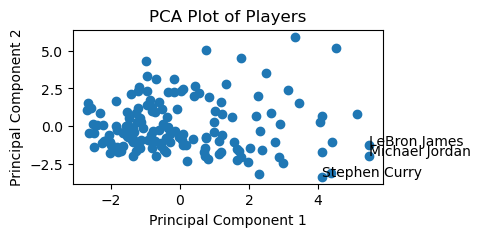

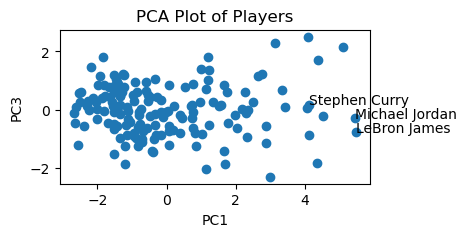

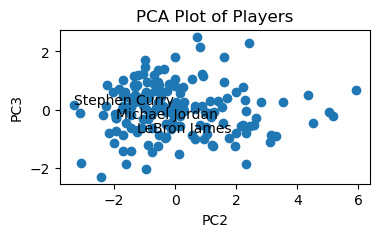

In [60]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
df_scaled = scaler.fit_transform(final_df)
pca = PCA(n_components=3)
pca.fit(df_scaled)
print("Explained Variance Ratios:")
print(pca.explained_variance_ratio_)
# Project the standardized data onto the principal components
pca_scores = pca.transform(df_scaled)

# Extract the scores for the first two principal components
pc1 = pca_scores[:, 0]
pc2 = pca_scores[:,1]

# Plot the players based on the principal components
plt.figure(figsize=(4, 2))
plt.scatter(pc1,pc2)

# Add labels to each point
for i, player in enumerate(final_df.index):
    if player in list(selected_players):
        plt.annotate(player, (pc1[i], pc2[i]))

# Add axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Players')

######
pc1 = pca_scores[:, 0] 
pc2 = pca_scores[:, 2]

plt.figure(figsize=(4, 2))
plt.scatter(pc1, pc2)

# Add labels to each point
for i, player in enumerate(final_df.index):
    if player in list(selected_players):
        plt.annotate(player, (pc1[i], pc2[i]))



plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PCA Plot of Players')


############ 
pc1 = pca_scores[:, 1]
pc2 = pca_scores[:, 2]

plt.figure(figsize=(4, 2))
plt.scatter(pc1, pc2)

# Add labels to each point
for i, player in enumerate(final_df.index):
    if player in list(selected_players):
        plt.annotate(player, (pc1[i], pc2[i]))



plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA Plot of Players')
# Show the plot
plt.show()


In [59]:
print("Principal Components:")
print(final_df.columns)
abs(pca.components_)

pc_df = pd.DataFrame(data=np.abs(pca.components_), index=['PC1', 'PC2', 'PC3'], columns=final_df.columns)

print(pc_df)

Principal Components:
Index(['PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'STL', 'BLK',
       'TOV'],
      dtype='object')
          PTS    FG_PCT    FT_PCT   FG3_PCT       AST       REB       STL  \
PC1  0.285519  0.402492  0.278288  0.400498  0.345329  0.292502  0.314272   
PC2  0.155828  0.031802  0.540501  0.053519  0.376111  0.489035  0.073774   
PC3  0.628925  0.033368  0.160480  0.083266  0.153019  0.244954  0.575563   

          BLK       TOV  
PC1  0.398230  0.237640  
PC2  0.012292  0.541749  
PC3  0.143316  0.368000  


### cut


In [314]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming you have a dataframe 'df' with the player statistics

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(df_scaled)

# Determine the number of clusters (assuming 2 clusters)
num_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Extract the scores for the first two principal components
pc1 = pca_scores[:, 1] * -1
pc2 = pca_scores[:, 0]

# Plot the players based on the principal components and clusters
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=cluster_labels, cmap='viridis')

# Add labels to each point
for i, player in enumerate(df.index):
    if player == 'LeBron James' or player == 'Michael Jordan' or player == 'Anthony Davis' or player == "Zion Williamson":
        plt.annotate(player, (pc1[i], pc2[i]))

# Add axis labels and title
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 1')
plt.title('PCA Plot of Players with Clusters')

# Show the plot
plt.show()

/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

## An old player

In [362]:
player_id=player_ids['Wilt Chamberlain']
wilt = PlayerCareerStats(player_id=player_id).get_data_frames()[0]

In [363]:
wilt

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,76375,1959-60,00,1610612744,PHW,23.0,72,None,3338.0,1065,...,0.582,None,None,1941,168,None,None,None,150,2707
1,76375,1960-61,00,1610612744,PHW,24.0,79,None,3773.0,1251,...,0.504,None,None,2149,148,None,None,None,130,3033
2,76375,1961-62,00,1610612744,PHW,25.0,80,None,3882.0,1597,...,0.613,None,None,2052,192,None,None,None,123,4029
3,76375,1962-63,00,1610612744,SFW,26.0,80,None,3806.0,1463,...,0.593,None,None,1946,275,None,None,None,136,3586
4,76375,1963-64,00,1610612744,SFW,27.0,80,None,3689.0,1204,...,0.531,None,None,1787,403,None,None,None,182,2948
5,76375,1964-65,00,1610612755,PHL,28.0,35,None,1558.0,427,...,0.526,None,None,780,133,None,None,None,70,1054
6,76375,1964-65,00,1610612744,SFW,28.0,38,None,1743.0,636,...,0.416,None,None,893,117,None,None,None,76,1480
7,76375,1964-65,00,0,TOT,28.0,73,None,3301.0,1063,...,0.464,None,None,1673,250,None,None,None,146,2534
8,76375,1965-66,00,1610612755,PHL,29.0,79,None,3737.0,1074,...,0.513,None,None,1943,414,None,None,None,171,2649
9,76375,1966-67,00,1610612755,PHL,30.0,81,None,3682.0,785,...,0.441,None,None,1957,630,None,None,None,143,1956
